In [ ]:
import pandas as pd

df = pd.read_csv('/content/resultados_metricas_topicos.csv')
df

,ID do Tópico,Saída LLM,Média BLEU,Desvio Padrão BLEU,Média ROUGE,Desvio Padrão ROUGE,Média Similaridade Cosine,Desvio Padrão Similaridade Cosine,Média BERTScore,Desvio Padrão BERTScore
0,0,Feminismo e Aborto,1.275007e-231,0.0,0.0853,0.1013,0.0364,0.0967,0.7256,0.0344
1,1,Maternidade,0.000000e+00,0.0,0.3138,0.2745,0.3769,0.2820,0.7869,0.0855
2,2,Esporte Olímpico,0.000000e+00,0.0,0.1352,0.1550,0.0861,0.1330,0.6803,0.0416
3,3,Masculinidades e feminismo,1.092863e-231,0.0,0.0970,0.1496,0.0000,0.0000,0.7361,0.0496
4,4,Violência Doméstica,0.000000e+00,0.0,0.3858,0.3272,0.3076,0.3263,0.7657,0.0923
5,5,Maquiagem e Aparência,1.275007e-231,0.0,0.0531,0.1254,0.0215,0.0757,0.6900,0.0320
6,6,Feminismo,0.000000e+00,0.0,0.0417,0.1730,0.0481,0.1844,0.7506,0.0625
7,7,Luta contra a homofobia e discriminação LGBT,8.850477e-232,0.0,0.1257,0.1455,0.0745,0.1374,0.6835,0.0685
8,8,Discriminação racial e racismo,8.814204e-232,0.0,0.2036,0.1476,0.1759,0.1535,0.7830,0.0567
9,9,Transtornos mentais e Psicologia,1.254329e-231,0.0,0.0525,0.0961,0.0179,0.0534,0.7279,0.0403


In [ ]:
print(df.iloc[:, -1])

0    0.0344
1    0.0855
2    0.0416
3    0.0496
4    0.0923
5    0.0320
6    0.0625
7    0.0685
8    0.0567
9    0.0403
Name: Desvio Padrão BERTScore, dtype: float64


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Interpretação de tópicos  (respostas) - Cópia de Respostas ao formulário 1 (2).csv')

In [ ]:
len(df)

38

In [ ]:
respostas_humanas = [df[coluna].tolist() for coluna in df.columns]

In [ ]:
respostas_humanas

In [ ]:
import json
with open('/content/response.json', 'r', encoding='utf-8') as file:
    json_data = json.load(file)
respostas_llm = list(json_data.values())
respostas_llm

['Feminismo e Aborto',
 'Maternidade',
 'Esporte Olímpico',
 'Masculinidades e feminismo',
 'Violência Doméstica',
 'Maquiagem e Aparência',
 'Feminismo',
 'Luta contra a homofobia e discriminação LGBT',
 'Discriminação racial e racismo',
 'Transtornos mentais e Psicologia']

In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=65127db820fa141f3157364c7a6fd1c6521be645303a659a770f406cbdb1dbd2
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
!pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from bert_score import score as bertscore
import nltk
from nltk.corpus import stopwords
import statistics

nltk.download('stopwords')

stopwords_pt = stopwords.words('portuguese')

# Funções para cálculo das métricas
def calcular_similaridade_cosine(texto1, texto2):
    vect = TfidfVectorizer(stop_words=stopwords_pt).fit_transform([texto1, texto2])
    similarity = cosine_similarity(vect[0:1], vect[1:2])
    return similarity[0][0]

def calcular_bleu(referencias_humanas, resposta_llm):
    referencias = [ref.split() for ref in referencias_humanas]
    candidato = resposta_llm.split()
    return sentence_bleu(referencias, candidato)

def calcular_rouge(resposta_humana, resposta_llm):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(resposta_humana, resposta_llm)
    return scores['rougeL'].fmeasure  # Retorna a F1 Score do ROUGE-L

def calcular_bertscore(resposta_humana, resposta_llm):
    P, R, F1 = bertscore([resposta_llm], [resposta_humana], lang="pt", verbose=False)
    return F1.mean().item()  # Retorna a média do F1 Score

def calcular_metricas_por_topico(respostas_llm, respostas_humanas):
    resultados = []

    for i in range(len(respostas_llm)):  # Para cada tópico
        resposta_llm = respostas_llm[i]
        respostas_humanas_topico = respostas_humanas[i]  # Todas as respostas humanas para este tópico

        bleu_scores = []
        rouge_scores = []
        cosine_scores = []
        bert_scores = []

        for resposta_humana in respostas_humanas_topico:
            if not resposta_humana.strip() or not resposta_llm.strip():
                continue  # Pular se uma das respostas for vazia

            cosine_sim = calcular_similaridade_cosine(resposta_humana, resposta_llm)
            bleu = calcular_bleu(resposta_humana, resposta_llm)
            rouge = calcular_rouge(resposta_humana, resposta_llm)
            bert_score = calcular_bertscore(resposta_humana, resposta_llm)

            cosine_scores.append(cosine_sim)
            bleu_scores.append(bleu)
            rouge_scores.append(rouge)
            bert_scores.append(bert_score)

        # Calcular as médias e desvios padrões
        media_cosine = sum(cosine_scores) / len(cosine_scores)
        media_bleu = sum(bleu_scores) / len(bleu_scores)
        media_rouge = sum(rouge_scores) / len(rouge_scores)
        media_bert = sum(bert_scores) / len(bert_scores)

        desvio_cosine = statistics.stdev(cosine_scores) if len(cosine_scores) > 1 else 0
        desvio_bleu = statistics.stdev(bleu_scores) if len(bleu_scores) > 1 else 0
        desvio_rouge = statistics.stdev(rouge_scores) if len(rouge_scores) > 1 else 0
        desvio_bert = statistics.stdev(bert_scores) if len(bert_scores) > 1 else 0

        resultados.append({
            "ID do Tópico": i,
            "Saída LLM": resposta_llm,
            "Média BLEU": media_bleu,
            "Desvio Padrão BLEU":  desvio_bleu,
            "Média ROUGE": round(media_rouge,4),
            "Desvio Padrão ROUGE": round(desvio_rouge,4),
            "Média Similaridade Cosine":  round(media_cosine,4),
            "Desvio Padrão Similaridade Cosine":  round(desvio_cosine,4),
            "Média BERTScore":  round(media_bert,4),
            "Desvio Padrão BERTScore":  round(desvio_bert,4)
        })

    return resultados

# Calculando métricas
resultados_metricas = calcular_metricas_por_topico(respostas_llm, respostas_humanas)

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados.to_csv("resultados_metricas_topicos.csv", index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram over

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

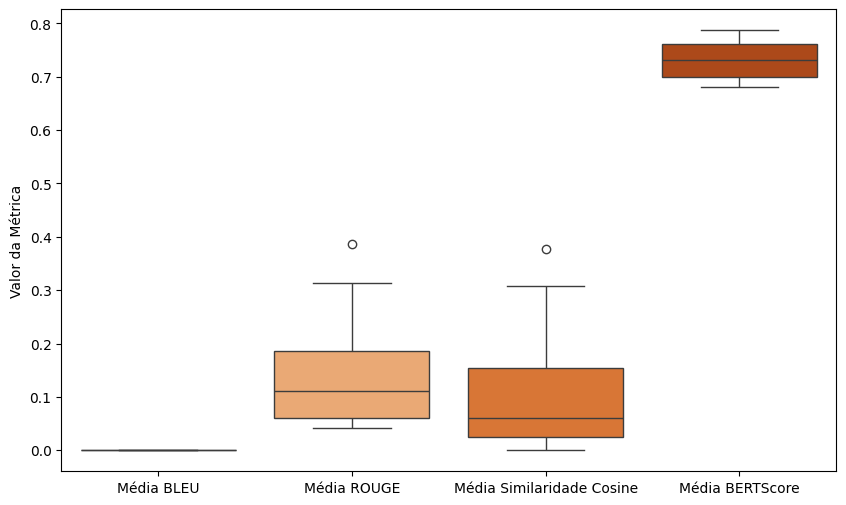

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir a paleta de cores para tons de laranja
orange_palette = sns.color_palette("Oranges", n_colors=4)

# Criando boxplots para as métricas com tons de laranja
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_resultados[["Média BLEU", "Média ROUGE", "Média Similaridade Cosine", "Média BERTScore"]], palette=orange_palette)

plt.ylabel('Valor da Métrica')
plt.show()

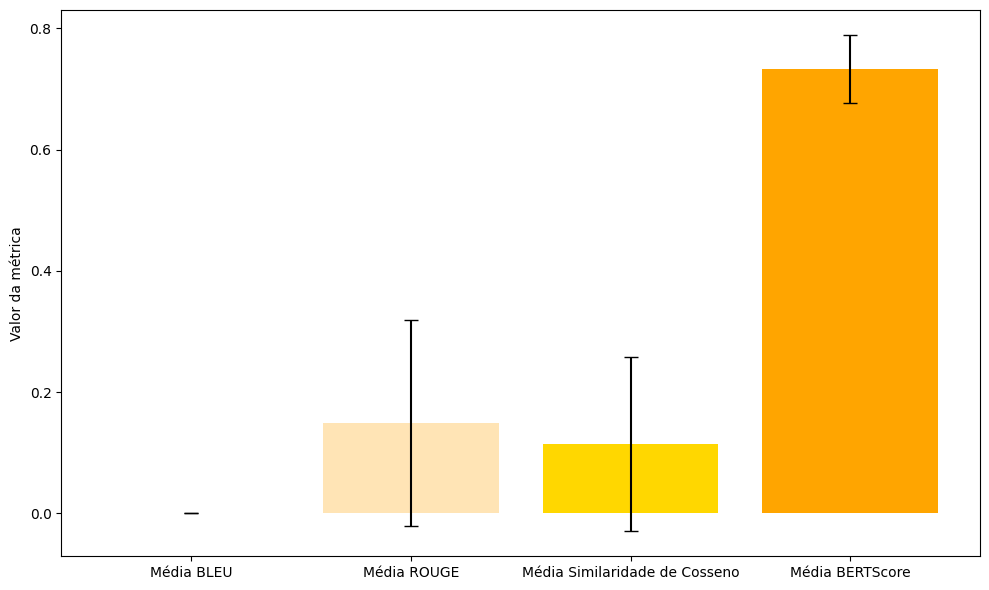

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

# Definindo as métricas e os valores médios e de desvio padrão
metricas = ['Média BLEU', 'Média ROUGE', 'Média Similaridade de Cosseno', 'Média BERTScore']
medias = [df_resultados['Média BLEU'].mean(),
          df_resultados['Média ROUGE'].mean(),
          df_resultados['Média Similaridade Cosine'].mean(),
          df_resultados['Média BERTScore'].mean()]

desvios = [df_resultados['Desvio Padrão BLEU'].mean(),
           df_resultados['Desvio Padrão ROUGE'].mean(),
           df_resultados['Desvio Padrão Similaridade Cosine'].mean(),
           df_resultados['Desvio Padrão BERTScore'].mean()]

# Criando o gráfico de barras com barras de erro em tons de laranja claros
plt.figure(figsize=(10, 6))
light_orange_palette = ['#FFDAB9', '#FFE4B5', '#FFD700', '#FFA500']  # Tons de laranja mais claros
plt.bar(metricas, medias, yerr=desvios, capsize=5, color=light_orange_palette)

# Configurações do gráfico
plt.ylabel('Valor da métrica')
plt.tight_layout()

# Salvar o gráfico em PDF
plt.savefig("metricas_com_desvio_padrao.pdf", format="pdf")
